In [ ]:
pip install feedparser


In [ ]:
import csv
import feedparser

rss_feed_url = "https://news.google.com/rss/search?q=stock%20market%20news&hl=en-US&gl=US&ceid=US:en"

def retrieve_google_news_headlines(feed_url, num_results=500):
    all_headlines = []

    entries_per_request = 100

    num_requests = num_results // entries_per_request
    if num_results % entries_per_request != 0:
        num_requests += 1

    for i in range(num_requests):
        start_index = i * entries_per_request
        feed = feedparser.parse(f"{feed_url}&start={start_index}&num={entries_per_request}")
        headlines = [entry.title for entry in feed.entries]

        if not headlines:
            break

        all_headlines.extend(headlines)

    return all_headlines

def save_headlines_to_csv(headlines, output_filename):
    with open(output_filename, "w", newline="", encoding="utf-8") as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(["Headline"])
        csv_writer.writerows([(headline,) for headline in headlines])

num_results_to_extract = 500
output_csv_filename = "google_news_headlines.csv"

headlines = retrieve_google_news_headlines(rss_feed_url, num_results_to_extract)
save_headlines_to_csv(headlines, output_csv_filename)
print(f"{len(headlines)} headlines extracted and saved to {output_csv_filename}")


480 headlines extracted and saved to google_news_headlines.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
filepath = r"/content/google_news_headlines.csv"

In [ ]:
data = pd.read_csv(filepath)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.iloc[:10]

,Headline,Publication Date
0,Stocks close higher to kick off big earnings w...,2023-10-16 20:04:28
1,"Stocks close higher, Dow rallies 300 points as...",2023-10-16 19:52:30
2,A Bull Market Is Coming: 2 AI Stock-Split Stoc...,2023-10-17 09:00:00
3,"Stock Market News Today, 10/17/23 – Futures Do...",2023-10-17 08:17:10
4,Stocks and Bonds Drift Before Biden’s Israel V...,2023-10-17 08:28:18
5,Stock Market Outlook: Odds of a Year-End Equit...,2023-10-16 18:36:00
6,"Stock Market Today: Dow, S&P Live Updates for ...",2023-10-16 22:42:36
7,Stock Market Starts The Week With A Bang; Lulu...,2023-10-16 16:14:00
8,"Stock Market News Today: Dow, S&P 500 Close Hi...",2023-10-16 22:20:00
9,"Stock Market News Today, 10/16/23 – Stocks Jum...",2023-10-16 20:03:45


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
def analyze_sentiment(headline):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(headline)
    return sentiment
analyzer = SentimentIntensityAnalyzer()


In [ ]:
def interpret_sentiment(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
positive_count = 0
neutral_count = 0
negative_count = 0

In [ ]:
for headline in df['Headline']:
    sentiment = analyzer.polarity_scores(headline)
    sentiment_label = interpret_sentiment(sentiment)
    if sentiment_label == "Positive":
        positive_count += 1
    elif sentiment_label == "Negative":
        negative_count += 1
    else:
        neutral_count += 1
    print(f"Headline: '{headline}'")
    print(f"Sentiment: {sentiment_label} ({sentiment['compound']:.2f})")
    print()


Headline: 'Stocks close higher to kick off big earnings week: Stock market news today - Yahoo Finance'
Sentiment: Neutral (0.00)

Headline: 'Stocks close higher, Dow rallies 300 points as optimism over earnings outweighs higher rates: Live updates - CNBC'
Sentiment: Positive (0.54)

Headline: 'A Bull Market Is Coming: 2 AI Stock-Split Stocks to Buy Right Now - The Motley Fool'
Sentiment: Negative (-0.44)

Headline: 'Stock Market News Today, 10/17/23 – Futures Down Ahead of Big Earnings Releases - TipRanks.com - TipRanks'
Sentiment: Neutral (0.00)

Headline: 'Stocks and Bonds Drift Before Biden’s Israel Visit: Markets Wrap - Yahoo Finance'
Sentiment: Neutral (0.00)

Headline: 'Stock Market Outlook: Odds of a Year-End Equity Rally Are Dwindling - Markets Insider'
Sentiment: Neutral (0.00)

Headline: 'Stock Market Today: Dow, S&P Live Updates for October 17 - Bloomberg'
Sentiment: Neutral (0.00)

Headline: 'Stock Market Starts The Week With A Bang; Lululemon Stock Rallies - Investor's Bus

In [ ]:
print(f"Positive headlines: {positive_count}")
print(f"Neutral headlines: {neutral_count}")
print(f"Negative headlines: {negative_count}")

Positive headlines: 160
Neutral headlines: 170
Negative headlines: 150


In [ ]:
if positive_count > negative_count and positive_count > neutral_count:
    overall_sentiment = "Positive"
elif negative_count > positive_count and negative_count > neutral_count:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"
print(f"The market sentiment is {overall_sentiment}.")

The market sentiment is Neutral.


In [ ]:
import pandas as pd
df = pd.read_csv('google_news_headlines.csv')

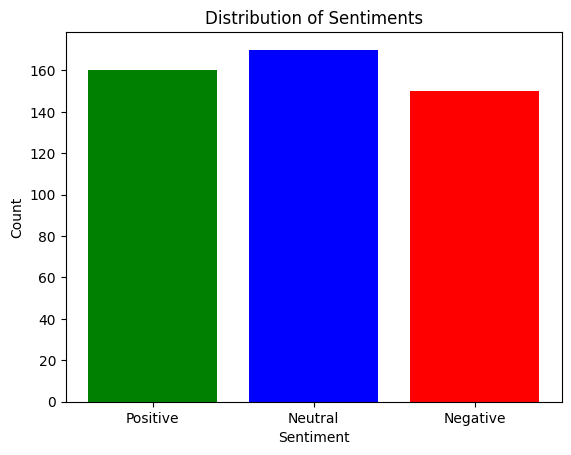

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = [positive_count, neutral_count, negative_count]
sentiments = ['Positive', 'Neutral', 'Negative']
plt.bar(sentiments, sentiment_counts, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

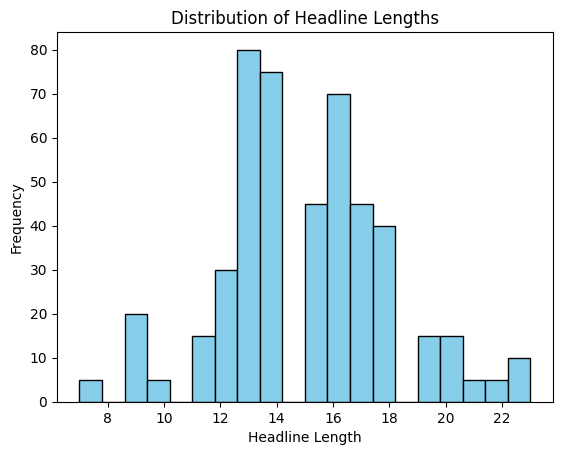

In [ ]:
df['Headline Length'] = df['Headline'].apply(lambda x: len(x.split()))
plt.hist(df['Headline Length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.show()

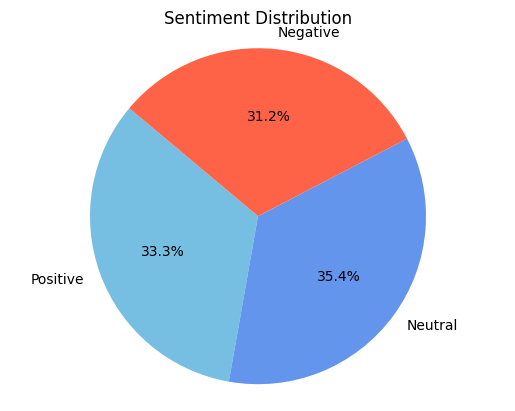

In [ ]:
plt.pie(sentiment_counts, labels=sentiments, autopct='%1.1f%%', startangle=140, colors=['#77BFE2', 'cornflowerblue', 'tomato'])
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()
